In [1]:
import sys
sys.path.append("..")
from PHaem import PHaem
from MonteCarlo import MonteCarlo

import numpy as np
import matplotlib.pyplot as plt

In [2]:
ex = PHaem(dh=25, ny=3, dip=110, H=50)
ex.setup_simulation()

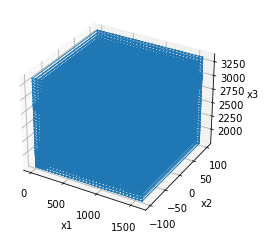

OcTreeMesh: 32.07% filled

Level : Number of cells               Mesh Extent               Cell Widths    
-----------------------           min     ,     max            min   ,   max   
  1   :       795            ---------------------------   --------------------
  2   :      1832         x:      0.0     ,   1600.0          25.0   ,    50.0   
-----------------------   y:    -100.0    ,    100.0         100.0   ,   200.0   
Total :      2627         z:    1755.67   ,   3355.67         25.0   ,    50.0

In [3]:
ex.mesh.plotGrid(show_it=True)
ex.mesh

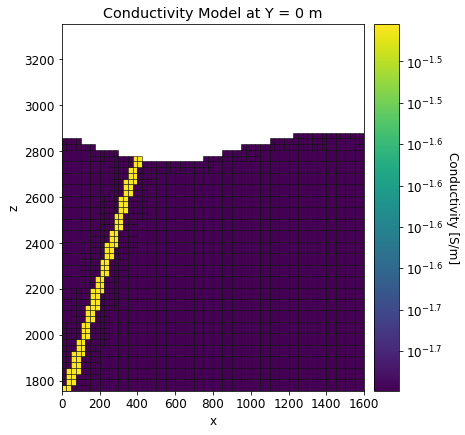

In [4]:
ex.plot_slice()

In [5]:
ex.simulate();

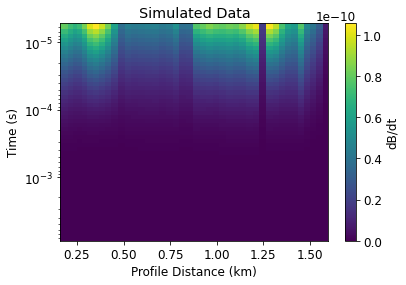

In [6]:
ex.plot_data()

# Monte Carlo

In [7]:
MCfolder = 'data/tmp/'
N=50

dip = [25, 165] #uniform
H = [120, 40] #normal
xpos = [400,40] #normal
rho_fault = [20, 10, .45] #lognormal
rho_back = [40, 30, .8] #lognormal

dep = 1000 #Minimum depth within domain (m)
xtra = 1000 #Buffer on each end of electrodes
dh = 50
y0 = 100
ny = 3

seed = 0
overwrite = True
parallel = False
nproc = None
showDists = True
saveParams=True

In [8]:
MC = MonteCarlo(dep,
                xtra, 
                dh,
                y0,
                ny,
                dip, 
                H, 
                xpos,
                rho_fault, 
                rho_back, 
                N, 
                MCfolder, 
                overwrite=overwrite, 
                parallel=parallel, 
                nproc=nproc, 
                seed=seed,
                showDists=showDists, 
                saveParams=saveParams)

MC folder already exists. Overwriting.


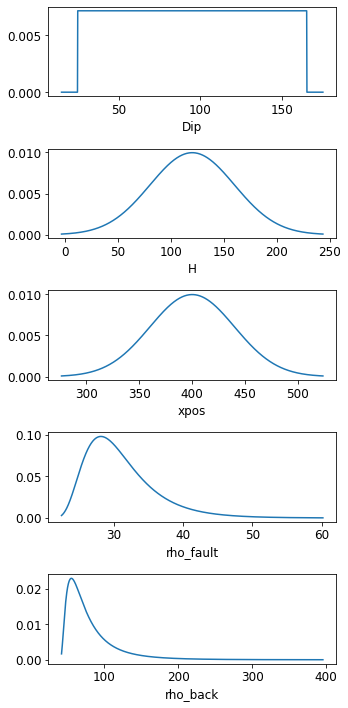

In [9]:
MC.plot_dists(figsize=(5,10))

Fracture dip angle: 37.2
Fracture thickness (m): 132.1
Fracture outcrop x-position (m): 370.1
Fracture zone resistivity (Ohm-m): 26.15
Background resistivity (Ohm-m): 56.62


OcTreeMesh: 56.59% filled

Level : Number of cells               Mesh Extent               Cell Widths    
-----------------------           min     ,     max            min   ,   max   
  1   :       127            ---------------------------   --------------------
  2   :      1032         x:      0.0     ,   1600.0          50.0   ,   100.0   
-----------------------   y:    -100.0    ,    100.0         100.0   ,   200.0   
Total :      1159         z:    1755.67   ,   3355.67         50.0   ,   100.0

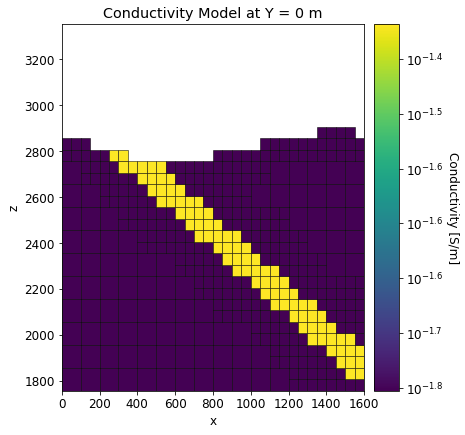

In [10]:
r = 15
print("Fracture dip angle: "+str(np.round(MC.PARAMS[r][1],2)))
print("Fracture thickness (m): "+str(np.round(MC.PARAMS[r][2],2)))
print("Fracture outcrop x-position (m): "+str(np.round(MC.PARAMS[r][3],2)))
print("Fracture zone resistivity (Ohm-m): "+str(np.round(MC.PARAMS[r][4],2)))
print("Background resistivity (Ohm-m): "+str(np.round(MC.PARAMS[r][5],2)))

setup = MC.prepare_realization(r)
setup.plot_slice()
setup.mesh

In [11]:
# data = MC.realize(r)

In [12]:
# data.plot_data()